# Generate $K$ coins

In [78]:
import numpy as np

K = 10
p = 0.05
T = 100000

coins = [
    (np.random.binomial(1, 0.5 + p, T) * 2 - 1)
    for i in range(K)
]

# Run Wald's Test

In [79]:
from math import log
from math import sqrt

def wald(gamma, delta, wsum):
    rou = (0.5 + 2 * gamma) * (0.5 - gamma) / (0.5 - 2 * gamma) / (0.5 + gamma)
    alpha = 1.0 / rou * log((1.0 - delta) / delta)
    beta = 1.0 / rou * log((0.5 - gamma) / (0.5 - 2 * gamma))
    return alpha + beta * wsum


2886.6455119


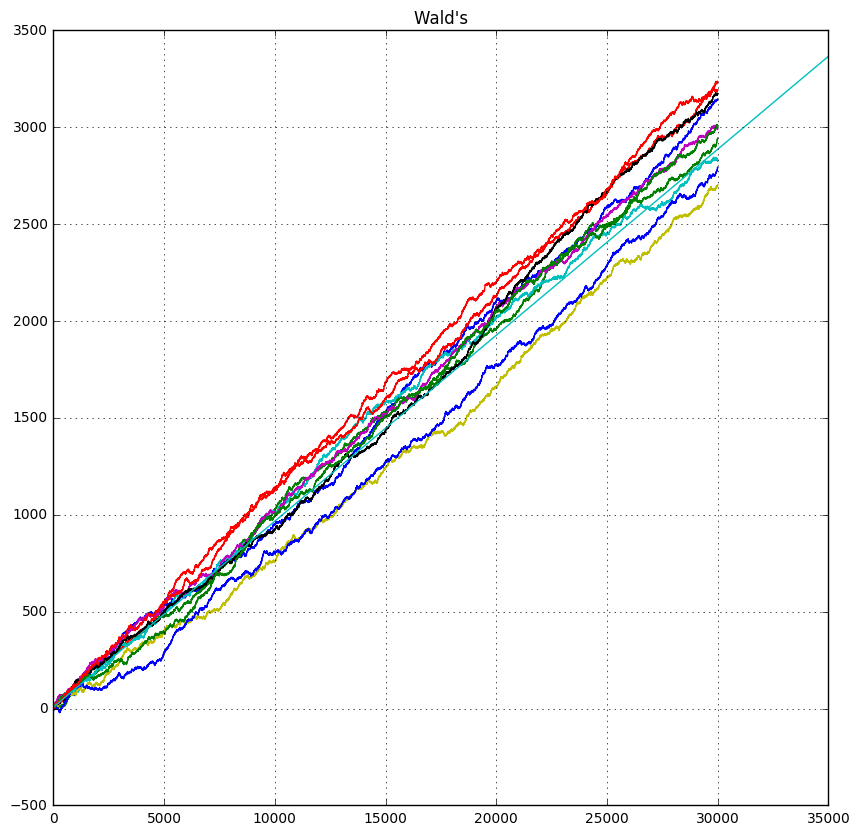

In [80]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot(gamma, delta, T=30000):
    if T == 0:
        T = len(coins[0])
    plt.figure(figsize=(10, 10))
    for coin in coins:
        plt.plot(np.cumsum(coin[:T]))
    plt.plot([wald(gamma, delta, i) for i in range(1, T+5000)])
    plt.grid()
    print getThreshold(gamma, delta, T)


gamma = p
delta = pow(10, -3) / K
plot(gamma, delta)
plt.title("Wald's")

# Run Balsubramani and Ramda

0.05


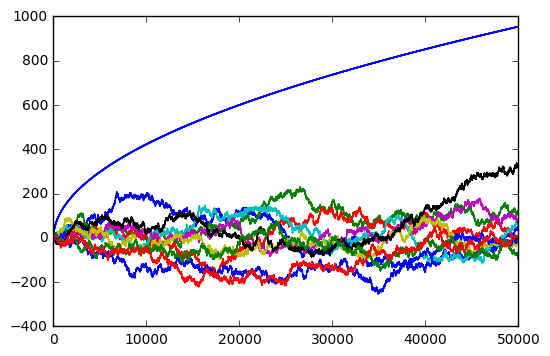

In [81]:
def br(gamma, alpha, x0, x1, prevT, prevV):
    c = (x0 - 2 * gamma) * (x1 - 2 * gamma)
    currT = prevT + c
    currV = prevV + c * c
    const = alpha * log(1.0 / alpha)
    try:
        return (currT, currV,
                const + sqrt(2 * currV * log(log(currV) / alpha)))
    except:
        return (currT, currV, const)

gamma = p
print gamma
delta = pow(10, -3)

for coin in coins:
    t, v = 0.0, 0.0
    lh, rh = [], []
    for i in range(0, len(coin) - 1, 2):
        t, v, rhs = br(gamma, delta, coin[i], coin[i + 1], t, v)
        lh.append(t)
        rh.append(rhs)
    plt.plot(range(len(lh)), lh)
    plt.plot(range(len(rh)), rh, c='b')